My first attempt at a regression model on Kaggle

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from scipy.stats import skew
from scipy.stats.stats import pearsonr

#sklearn
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Import Data

In [2]:
train_in = pd.read_csv("data/train.csv", header = 0, encoding = 'utf-8')

In [3]:
test_in = pd.read_csv("data/test.csv", header = 0, encoding = 'utf-8')

In [4]:
train = train_in.copy()
test = test_in.copy()

In [5]:
pd.options.display.max_columns = 81

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

A mix of int and object. With a few nulls that will need to be dealt with.

## Visualisations

<function matplotlib.pyplot.show>

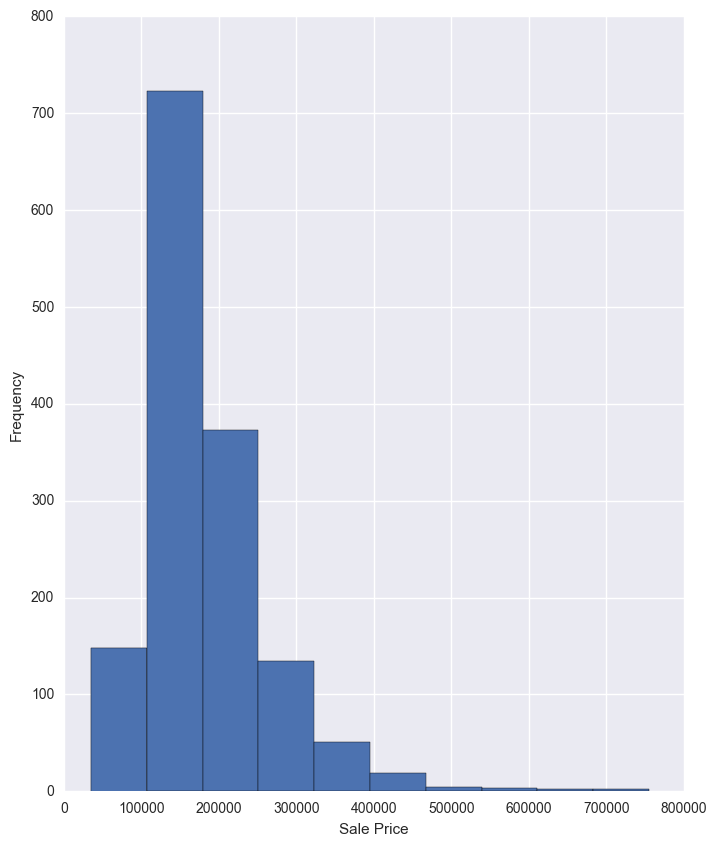

In [135]:
plt.hist(train['SalePrice'])
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show

Pretty Skewed. Might be best to scale it later.

### Correlation Matrix

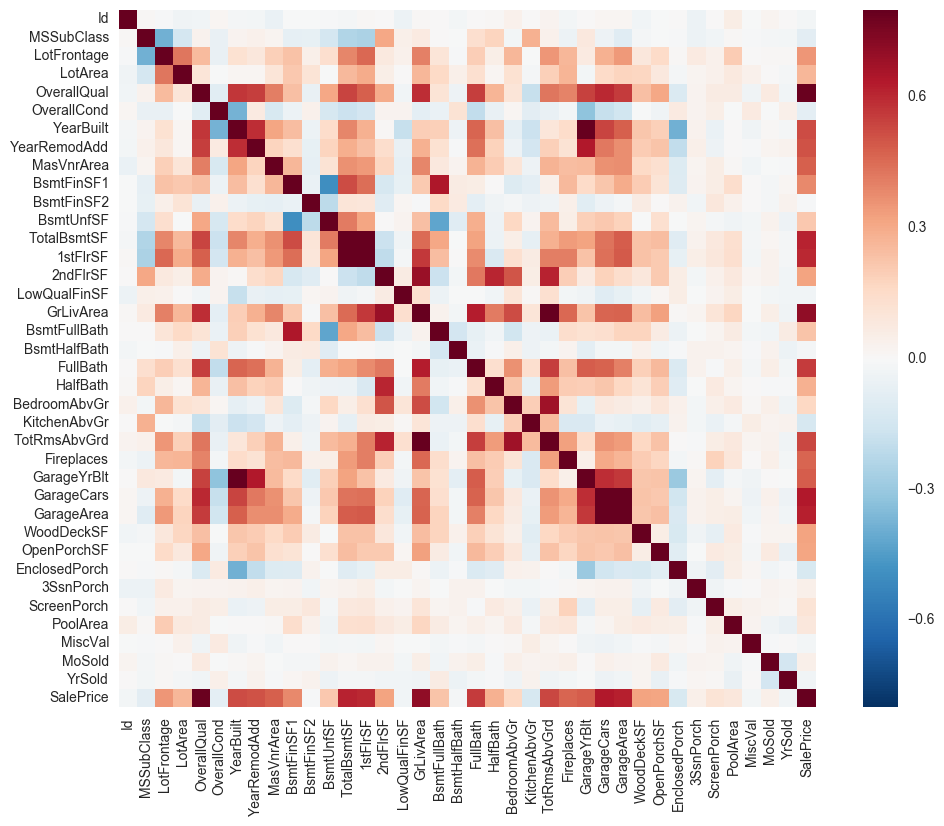

In [9]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

We can see some intercorrelations between 'TotalBsmtSF' and '1stFlr', 'GarageCars' and 'GarageArea', 'YearBuilt' and 'GarageYrBlt. It will be best to remove some of these from the modelling. 

Focussing on the SalePrice column, we can see a few deep red boxes, indicating high correlation. 

In [10]:
corrmat.nlargest(12,'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt'],
      dtype='object')

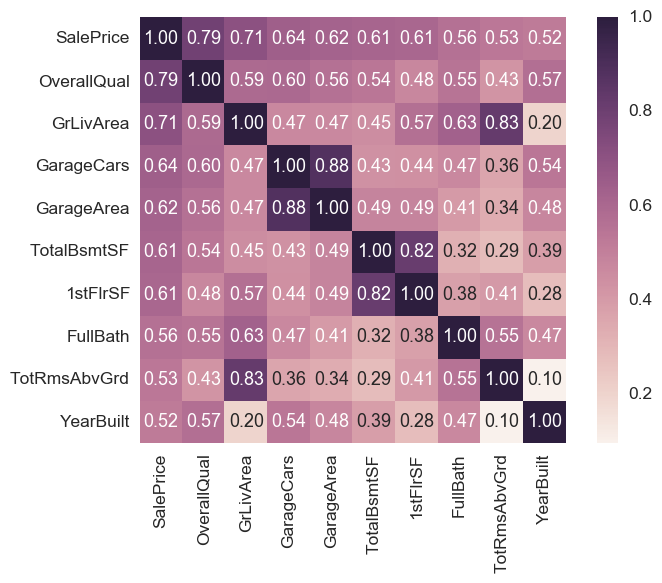

In [11]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

This above plot shows the 10 features most correlated with SalePrice. As you can see some are correlated highly with themselves as well. We will drop those. Leaving us with 7 numerical features

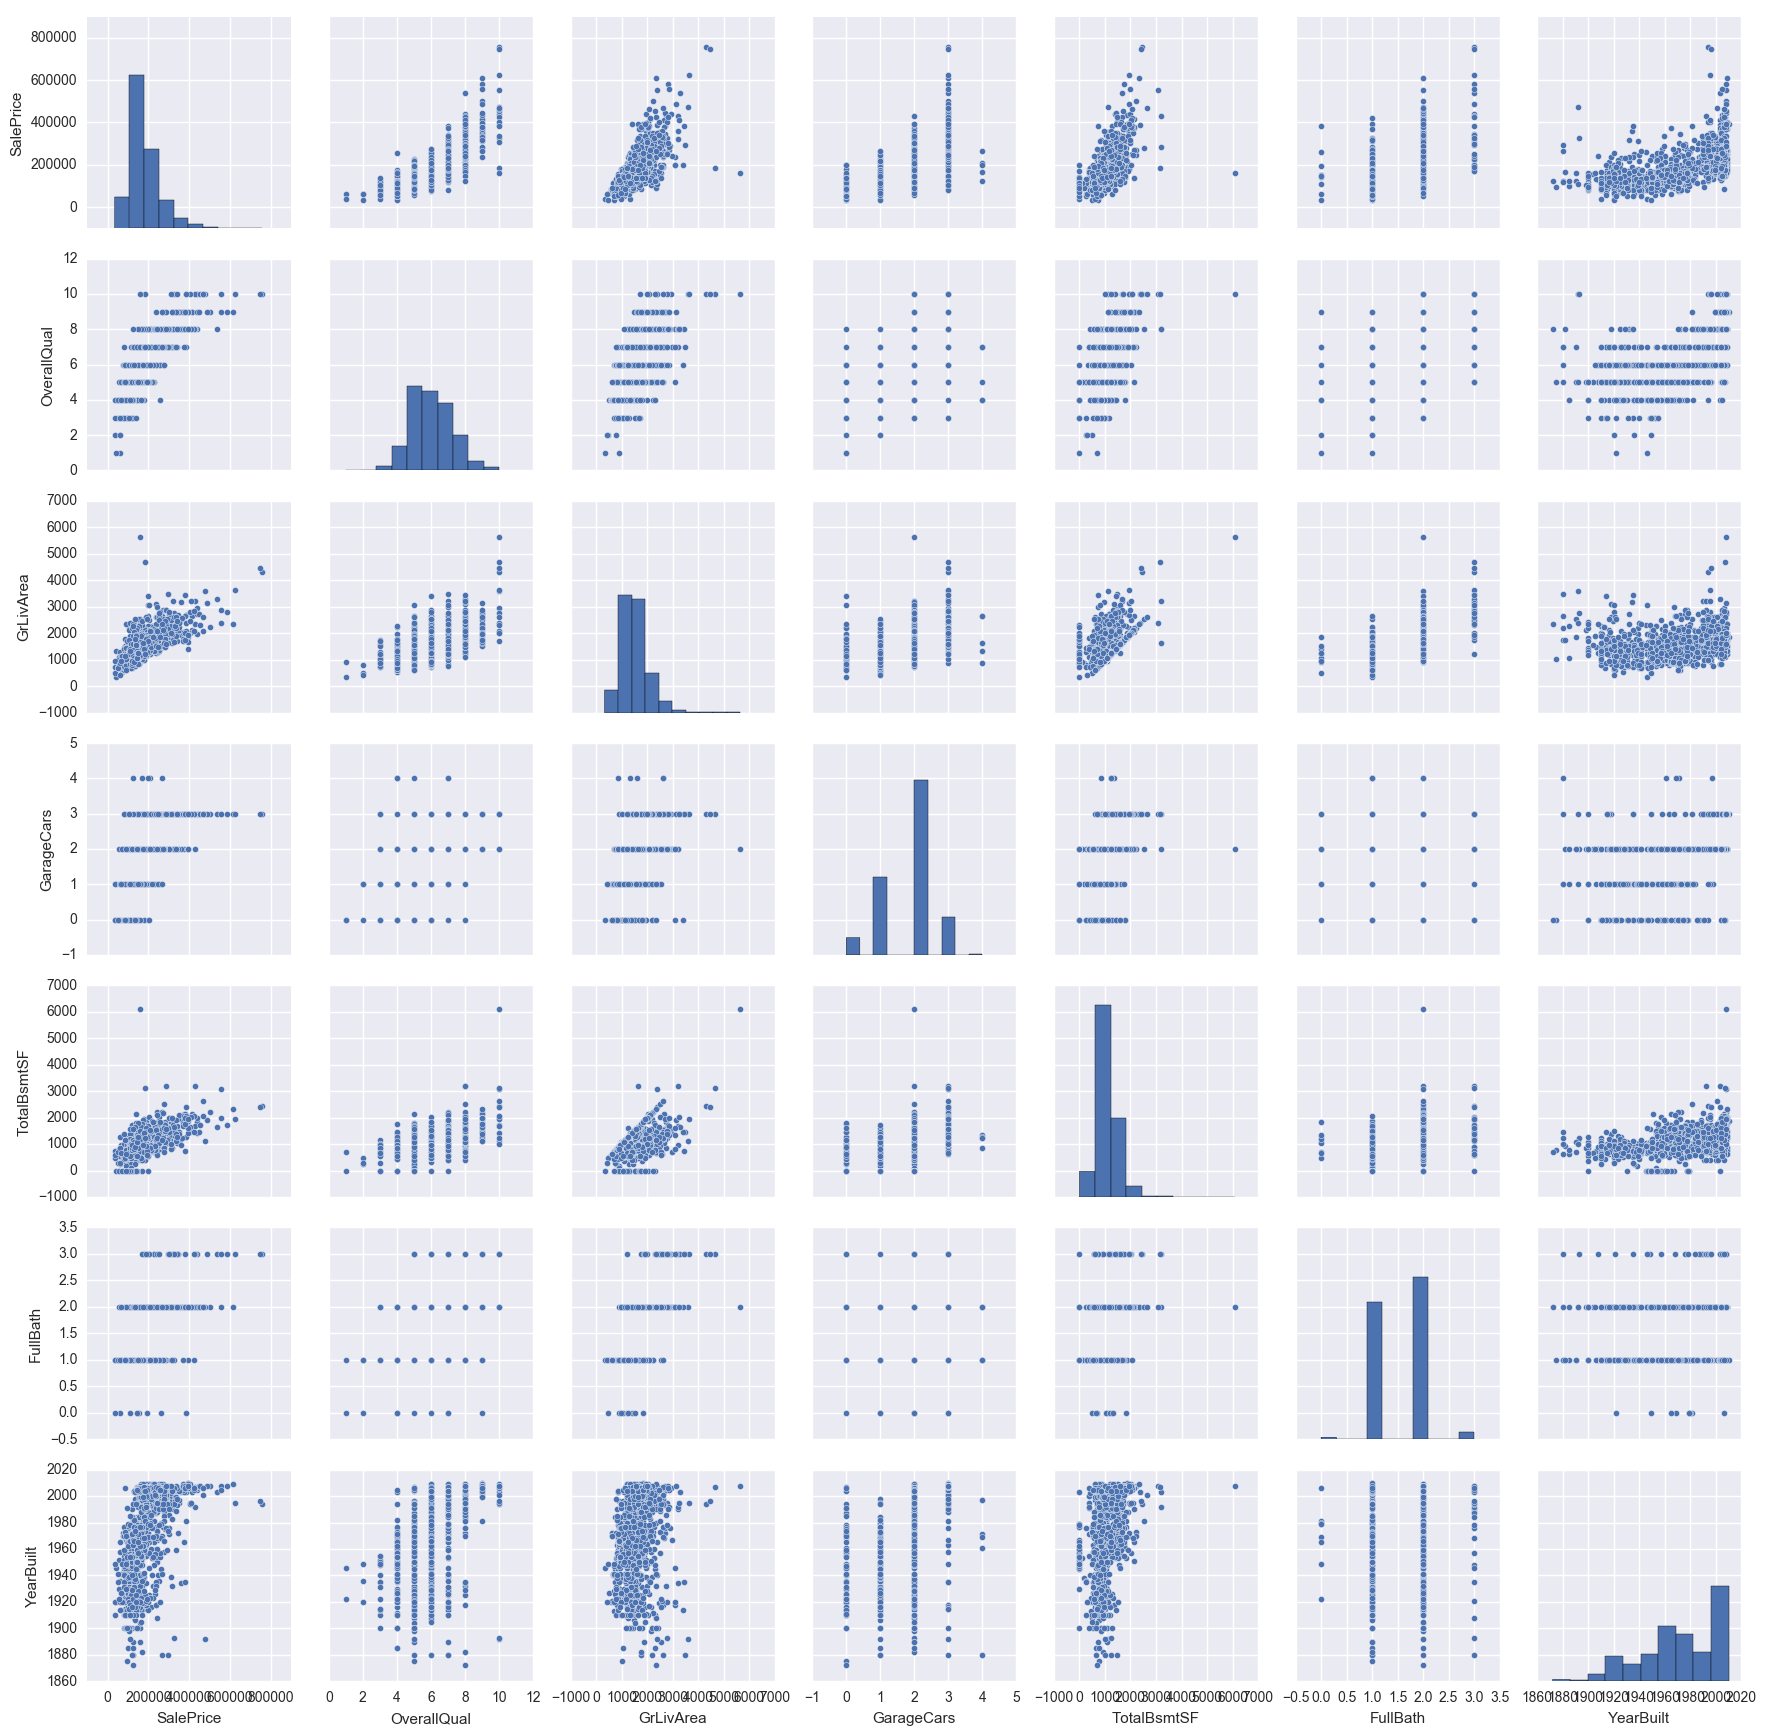

In [12]:
#scatterplot
sns.set()
feat_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[feat_cols], size = 2.5)
plt.show();

In [13]:
num_train = train[feat_cols]

## Data Cleaning

### Numerical Data

In [14]:
num_train.isnull().sum() # no nulls. good. 

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
dtype: int64

### Null Data 

In [15]:
null_pc = train.isnull().sum()/len(train) 
null_pc[null_pc > 0.40]

Alley          0.937671
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

4 features with greater than 40% nulls. Will drop those above 80%. FireplaceQu deserves further investigation

In [16]:
train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [17]:
train.groupby('FireplaceQu')['SalePrice'].mean().sort_values(ascending=False)

FireplaceQu
Ex    337712.500000
Gd    226351.415789
TA    205723.488818
Fa    167298.484848
Po    129764.150000
Name: SalePrice, dtype: float64

No Suprises that the SalesPrice increases as the quality of Fireplace increases. Need to verify that the value is NA only when the number of fireplaces is 0. If this is the case can then replace the NAs with none and see where that fits in SalePrice-wise

In [18]:
train[train['Fireplaces'] == 0]['FireplaceQu'].isnull().sum()

690

In [19]:
train[train['FireplaceQu'].isnull()]['Fireplaces'].value_counts()

0    690
Name: Fireplaces, dtype: int64

In [20]:
train['FireplaceQu'].fillna('None', inplace = True)

In [21]:
train.groupby('FireplaceQu')['SalePrice'].mean().sort_values(ascending=False)

FireplaceQu
Ex      337712.500000
Gd      226351.415789
TA      205723.488818
Fa      167298.484848
None    141331.482609
Po      129764.150000
Name: SalePrice, dtype: float64

Interesting. Having no fireplace is better for your sale price than having a poor quality one. 

In [22]:
null_pc = train.isnull().sum()/len(train) 
null_list = null_pc[null_pc > 0.40].index.tolist()

In [23]:
train.drop(null_list, axis =1 , inplace = True)

### Object Data

In [24]:
#get dummies
obj_train = train.select_dtypes(include = ['object'])

In [25]:
obj_train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [26]:
obj_train = pd.get_dummies(obj_train)

In [27]:
obj_train.isnull().sum().sum()

0

### Modelling Prep

In [28]:
y_train = num_train.SalePrice
X_train = np.asmatrix(num_train.drop('SalePrice', axis = 1))

In [29]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    rmse = np.mean(rmse)
    return(rmse)

## Initial Modelling

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
rmse_cv(lr)

38734.172818508778

In [33]:
initial_pred = cross_val_predict(lr, X_train, y_train, cv = 5)

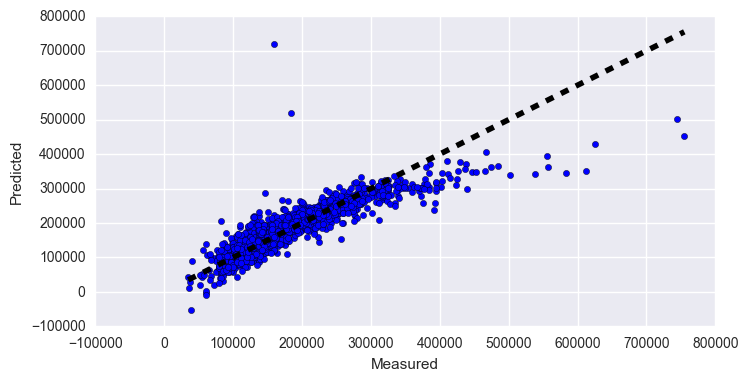

In [34]:
fig, ax = plt.subplots(figsize = (8,4))
ax.scatter(y_train, initial_pred)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Does relatively well early on, but fails to predict as the house price rises. Will look at using a ridge model before looking at unskewing data and then possible adding in the object data with dummies.

## Ridge Model

In [35]:
ridge_mod = Ridge()

In [36]:
rmse_cv(ridge_mod)

38733.273104147192

Barely a change, but a bit better.

In [37]:
ridge_pred = cross_val_predict(ridge_mod, X_train, y_train, cv = 5)

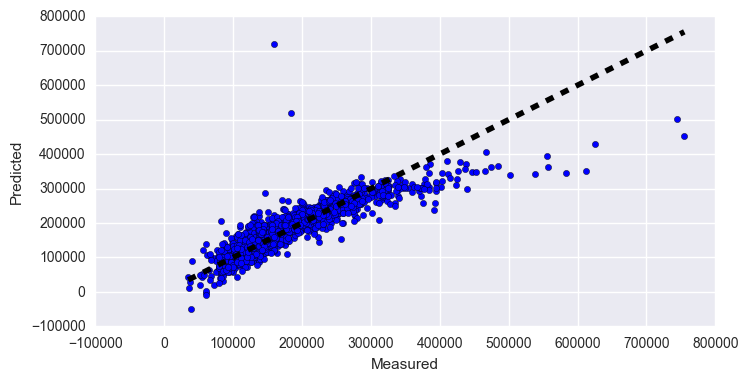

In [38]:
fig, ax = plt.subplots(figsize = (8,4))
ax.scatter(y_train, ridge_pred)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Dealing with Skewness

In [39]:
skewed_feats = num_train.apply(lambda x: skew(x.dropna())) #compute skewness

In [40]:
skewed_feats

SalePrice      1.880941
OverallQual    0.216721
GrLivArea      1.365156
GarageCars    -0.342197
TotalBsmtSF    1.522688
FullBath       0.036524
YearBuilt     -0.612831
dtype: float64

In [41]:
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

In [42]:
skewed_feats

Index(['SalePrice', 'GrLivArea', 'TotalBsmtSF'], dtype='object')

In [43]:
num_train[skewed_feats] = np.log1p(num_train[skewed_feats])

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [44]:
num_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,12.247699,7,7.444833,2,6.753438,2,2003
1,12.109016,6,7.141245,2,7.141245,2,1976
2,12.317171,7,7.488294,2,6.825460,2,2001
3,11.849405,7,7.448916,3,6.629363,1,1915
4,12.429220,8,7.695758,3,7.044033,2,2000


<function matplotlib.pyplot.show>

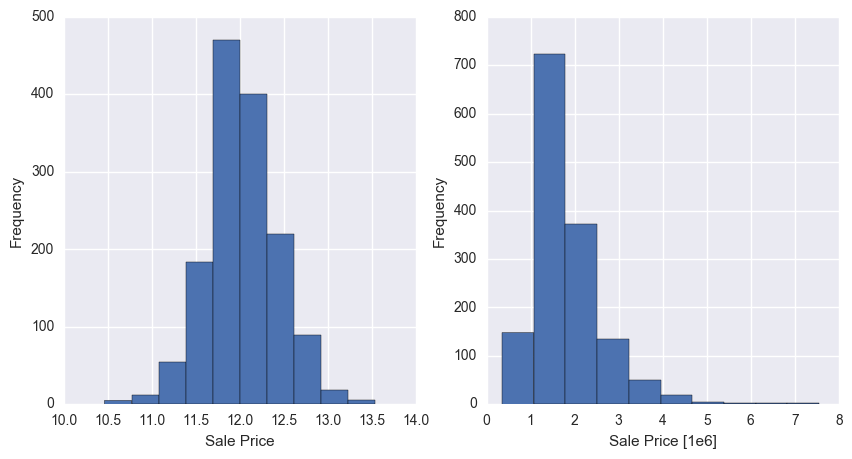

In [153]:
fig, ax =plt.subplots(1, 2,figsize = (10,5))
plt.subplot(1, 2, 1)
plt.hist(num_train['SalePrice'])
ax.
plt.ylabel('Frequency')
plt.xlabel('Sale Price')
plt.subplot(1, 2, 2)
plt.hist(train['SalePrice']/1e5)
plt.xlabel('Sale Price [1e6]')
plt.ylabel('Frequency')
plt.show

In [45]:
y_train = num_train.SalePrice
X_train = np.asmatrix(num_train.drop('SalePrice', axis = 1))

In [46]:
sk_lr = LinearRegression()

In [47]:
sk_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
rmse_cv(sk_lr)

0.17188909367849334

In [49]:
skewed_pred = cross_val_predict(lr, X_train, y_train, cv = 5)

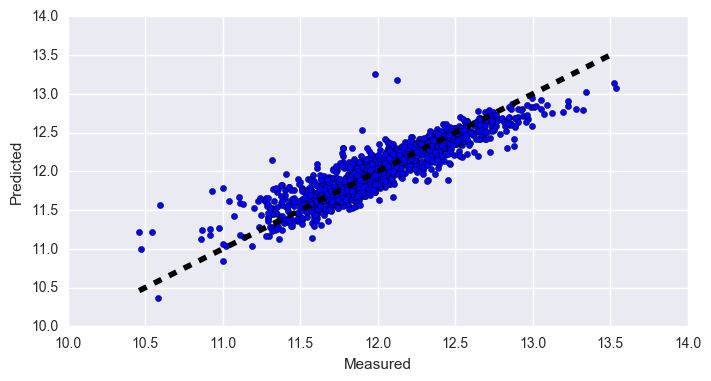

In [50]:
fig, ax = plt.subplots(figsize = (8,4))
ax.scatter(y_train, skewed_pred)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Dealing with the Skewness gives a much better model with basic Linear Regression. Now move onto Ridge.

In [51]:
sk_ridge_mod = Ridge()

In [52]:
sk_ridge_mod.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
rmse_cv(sk_ridge_mod) 

0.1718852853738016

In [54]:
rmse_cv(sk_ridge_mod)  / rmse_cv(sk_lr)

0.99997784440763382

Almost exactly the same when dealing with skewness. Can play with the alpha.

In [55]:
alphas = [1e-6, 0.001, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

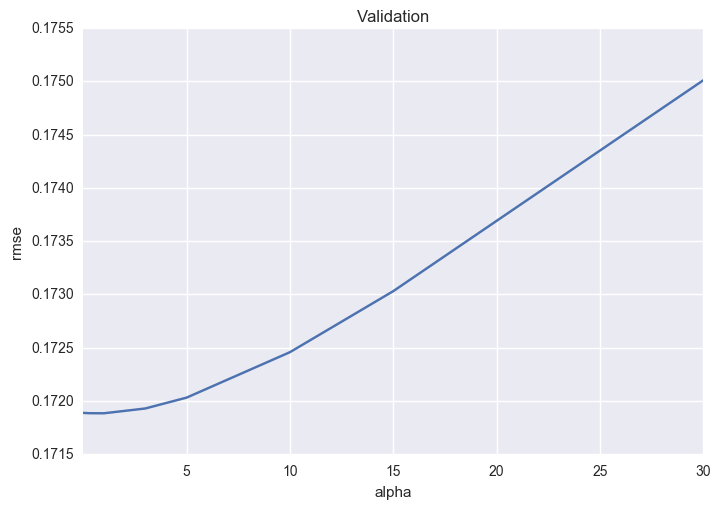

In [56]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

Should look at adding in the object data to try and improve model further.

### Addition of object features

In [57]:
compl_train = pd.concat([num_train, obj_train], axis = 1)

In [58]:
num_train.shape, compl_train.shape

((1460, 7), (1460, 247))

In [59]:
y_train = compl_train.SalePrice
X_train = compl_train.drop('SalePrice', axis = 1)

In [60]:
clr = LinearRegression()

In [61]:
clr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
rmse_cv(clr)

29428116.25048558

Pretty Poor, basic Linear Regression doesn't like the addition of all these features

In [63]:
c_ridge = Ridge()

In [64]:
c_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
rmse_cv(c_ridge)

0.1369666514378928

Now we are starting to see improvements.

In [66]:
c_pred = cross_val_predict(c_ridge, X_train, y_train, cv = 5)

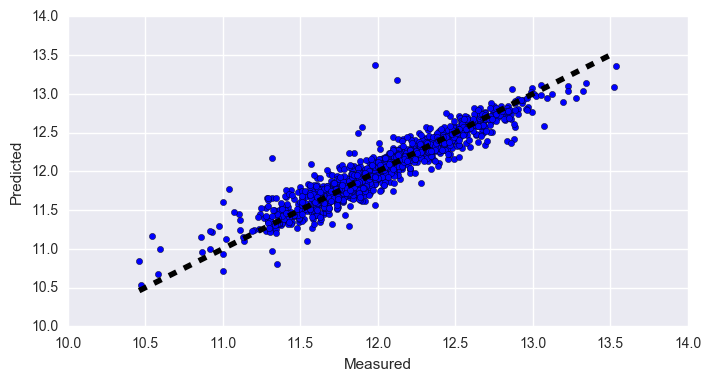

In [67]:
fig, ax = plt.subplots(figsize = (8,4))
ax.scatter(y_train, c_pred)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [68]:
alphas = [1e-6, 0.001, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

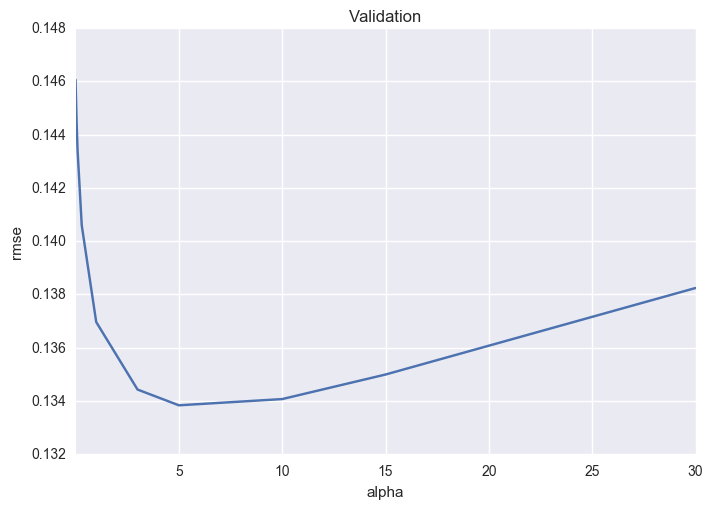

In [69]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [70]:
cv_ridge.min()

0.13384021465379009

So an alpha of 0.5 would give us the best rmse from Ridge. Let's try other models

## Lasso Model
Need to go back to all data as otherwise it gets messy predicting

In [115]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [117]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [118]:
all_data = pd.get_dummies(all_data)

In [119]:
all_data = all_data.fillna(all_data.mean())

In [120]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [121]:
lasso_model = LassoCV()

In [122]:
lasso_model.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [123]:
rmse_cv(lasso_model)

0.18638268544178599

We can improve this by tuning the alpha parameter again.

In [124]:
model_lasso = LassoCV(alphas = [10, 1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [125]:
rmse_cv(model_lasso).mean()

0.1227051859357908

In [130]:
lasso_pred = cross_val_predict(model_lasso, X_train, y_train, cv = 5)

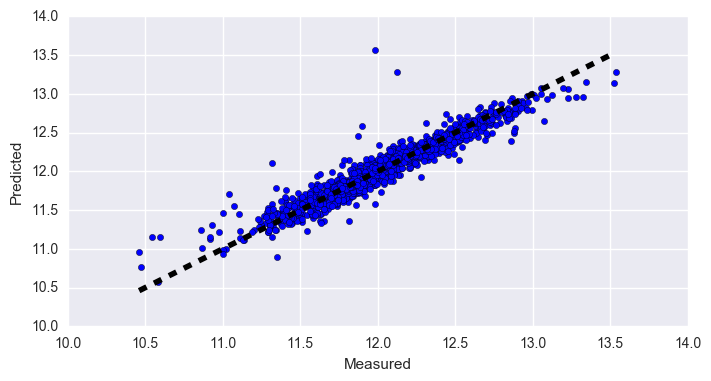

In [131]:
fig, ax = plt.subplots(figsize = (8,4))
ax.scatter(y_train, lasso_pred)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Looking good

## Final Predictions

In [132]:
lasso_preds = np.expm1(model_lasso.predict(X_test))

In [ ]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":lasso_preds})
solution.to_csv("housing_solution1.csv", index = False)

### Credit

Thanks to Alexandru Papiu for his excellent kernel which was a great tutorial.

https://www.kaggle.com/apapiu/regularized-linear-models